<a href="https://colab.research.google.com/github/NithuNIthisha/Digit-regonizer-by-multi_layer_NN/blob/main/digit_recognizer_multi_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [346]:
data = pd.read_csv("train.csv")
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_train = data.T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [347]:
dic_wei = {}
n_h0 =  X_train.shape[0]
n_h1 =  10
n_h2 = 10
n_h3 = 10
units_list =[n_h0,n_h1,n_h2,n_h3]
def init_params(units_list,n_l):
  for n in range(n_l):
    W = np.random.randn(units_list[n+1],units_list[n])*np.sqrt(1/units_list[n])
    b = np.zeros((units_list[n+1],1)) 
    dic_wei[f"W{n}"] = W
    dic_wei[f"b{n}"] = b
  return dic_wei




  

In [348]:
def reLU(x):
  return np.maximum(0,x)

In [349]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [350]:
dic_z_a = {}
def forward_propagation(X,parameters,n_l):
  a = X
  for n in range(n_l):
    Z = np.dot( parameters[f"W{n}"],a) + parameters[f"b{n}"]
    if n == 2:
      a = softmax(Z)
    else:
      a = reLU(Z)
    

    dic_z_a[f"Z{n}"] =  Z
    dic_z_a[f"a{n}"] = a
  
  return dic_z_a



In [351]:
def reluDerivative(x):
  return x > 0

In [352]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [353]:
dic_der_p = {}
def backpropagation(parameters,f,X,Y,n_l):
  m = X.shape[1]
  n = n_l -1
  while n >= 0:
    if n == 2:
      dZ = f[f"a{n}"] - one_hot(Y)
    else:
      dZ = np.multiply(da,reluDerivative(f[f"Z{n}"]))
    if n==0:
      dW = (1/m)*np.dot(dZ,X.T)
    else:
      dW = (1/m)*np.dot(dZ,f[f"a{n}"].T)
    db = (1/m)*np.sum(dZ)
    da = np.dot(parameters[f"W{n}"].T,dZ)
    dic_der_p[f"dW{n}"] = dW
    dic_der_p[f"db{n}"] = db
    n-=1
  return dic_der_p

In [354]:
dic_wei = {}
def update_params(parameters,der_b_w,alpha,n_l):
  for n in range(n_l):
    parameters[f"W{n}"] = parameters[f"W{n}"] - alpha*der_b_w[f"dW{n}"]
    parameters[f"b{n}"] = parameters[f"b{n}"] - alpha*der_b_w[f"db{n}"]

    dic_wei[f"W{n}"] =parameters[f"W{n}"]
    dic_wei[f"b{n}"] =parameters[f"b{n}"]
  return dic_wei

  

In [355]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [356]:
def nn_model(X,Y,f,n_l,iter,alpha):
  n_h0 =  X_train.shape[0]
  n_h1 =  10
  n_h2 = 10
  n_h3 = 10
  units_list =[n_h0,n_h1,n_h2,n_h3]
  parameters = init_params(units_list,n_l)
  for i in range(0,iter):


    f = forward_propagation(X,parameters,n_l)

    der_b_w = backpropagation(parameters,f,X,Y,n_l)

    parameters = update_params(parameters,der_b_w,alpha,n_l)


    if i%50 == 0:
      predictions = get_predictions(f["a2"])
      print("iteration :" ,i)
      print(get_accuracy(predictions,Y))

  return parameters








In [357]:
a = nn_model(X_train,Y_train,f,3,1000,0.15)

iteration : 0
[4 4 4 ... 7 4 4] [0 4 9 ... 8 1 9]
0.10335714285714286
iteration : 50
[4 4 9 ... 4 4 9] [0 4 9 ... 8 1 9]
0.3894285714285714
iteration : 100
[0 4 9 ... 8 3 9] [0 4 9 ... 8 1 9]
0.5695
iteration : 150
[0 4 9 ... 8 8 9] [0 4 9 ... 8 1 9]
0.6379523809523809
iteration : 200
[6 4 9 ... 8 8 9] [0 4 9 ... 8 1 9]
0.7294761904761905
iteration : 250
[6 4 9 ... 8 1 9] [0 4 9 ... 8 1 9]
0.7599047619047619
iteration : 300
[0 4 9 ... 8 1 9] [0 4 9 ... 8 1 9]
0.7858809523809523
iteration : 350
[0 4 9 ... 8 1 9] [0 4 9 ... 8 1 9]
0.8088571428571428
iteration : 400
[0 4 9 ... 8 1 9] [0 4 9 ... 8 1 9]
0.8261666666666667
iteration : 450
[0 4 9 ... 8 1 9] [0 4 9 ... 8 1 9]
0.8405476190476191
iteration : 500
[0 4 9 ... 8 1 9] [0 4 9 ... 8 1 9]
0.8411904761904762
iteration : 550
[0 4 9 ... 8 1 4] [0 4 9 ... 8 1 9]
0.7837619047619048
iteration : 600
[0 4 9 ... 8 1 9] [0 4 9 ... 8 1 9]
0.8608095238095238
iteration : 650
[0 4 9 ... 8 1 9] [0 4 9 ... 8 1 9]
0.8460952380952381
iteration : 700
[0 4

In [358]:
data_test = pd.read_csv("test.csv")
test_data = np.array(data_test)
X_test = test_data.T
X_test = X_test/255

In [359]:
def predictions(X, parameters):
    f = forward_propagation(X,parameters,3)
    predictions = get_predictions(f["a2"])
    return predictions

In [360]:
prediction = predictions(X_test, a)

In [361]:
pred = pd.DataFrame(prediction,columns = ["prediction"])
pred.to_csv("output.csv")

In [364]:
def test_predict(index, parameters):
    current_image = X_test[:, index, None]
    prediction = predictions(current_image,parameters)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  8


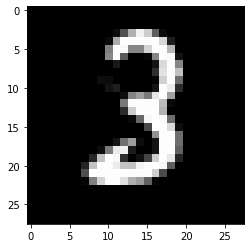

In [365]:
test_predict(4, a)